# Notebook to recreate CHIRTS-Daily Figures for Supplements

August 2020 <br>
Cascade Tuholske cascade@ucsb.edu

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams

In [14]:
DATA_IN = '../data/raw/'
viro_fn = 'lookup-table-for-Funk-ERA5.csv'
hot_days_fn = 'Global-HotDays-By-Year.csv'

viro = pd.read_csv(DATA_IN+viro_fn)
hot_days = pd.read_csv(DATA_IN+hot_days_fn)

In [15]:
viro.head()

,distance,ERA5,MERRA2,Princeton
0,0.000000,0.839485,0.778237,0.631637
1,1.004089,0.836835,0.777119,0.634843
2,2.008177,0.834361,0.776086,0.637866
3,3.012266,0.832059,0.775136,0.640712
4,4.016354,0.829923,0.774265,0.643385


In [ ]:
#### Spatial Variogram 

rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 

fig, axs = plt.subplots(1, 1, figsize = (10, 10), sharex=True);
ws = 0.25
fig.subplots_adjust(wspace=ws)

# Plots
axs.plot(viro['distance'], viro['ERA5'], linewidth = 4);
axs.plot(viro['distance'], viro['MERRA2'], linewidth = 4);
axs.plot(viro['distance'], viro['Princeton'], linewidth = 4);

# Titles & Texts
axs.set_title('Lagged Spatial Correlation with Station Data', size = 15 )
axs.set_ylabel('Expected R$^2$', fontsize = 13)
axs.set_xlabel('Distance (km)', fontsize = 13);

labels = ['ERA5', 'MERRA-2', 'PFG']
plt.legend(labels, loc=1, facecolor= 'white', edgecolor = 'white', fontsize = 15);

#plt.savefig(FIG_OUT+FN_OUT, dpi = 300, bbox_inches='tight')

In [47]:
hot_days.head()

,Year,Hot_Days,source
0,1983,1.018392,Station
1,1984,0.884045,Station
2,1985,1.078534,Station
3,1986,0.992936,Station
4,1987,0.969516,Station


In [46]:
#### Hot Days Per Year
np.unique(hot_days['source'])

chirts = hot_days[hot_days['source'] == 'CHIRTS']
era5 = hot_days[hot_days['source'] == 'ERA5']
pgf = hot_days[hot_days['source'] == 'PGF']
station = hot_days[hot_days['source'] == 'Station']

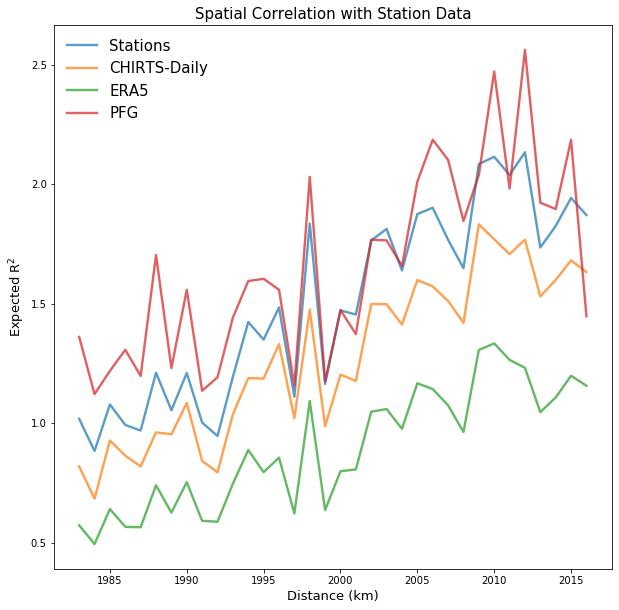

In [53]:
#### Plot
#### Spatial Variogram 

rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 

fig, axs = plt.subplots(1, 1, figsize = (10, 10), sharex=True);
ws = 0.25
fig.subplots_adjust(wspace=ws)

lw = 2.4
a = 70

# Plots
axs.plot(station['Year'], station['Hot_Days'], linewidth = lw, alpha = a);
axs.plot(chirts['Year'], chirts['Hot_Days'], linewidth = lw, alpha = a);
axs.plot(era5['Year'], era5['Hot_Days'], linewidth = lw, alpha = a);
axs.plot(pgf['Year'], pgf['Hot_Days'], linewidth = lw, alpha = a);

# Titles & Texts
axs.set_title('Spatial Correlation with Station Data', size = 15 )
axs.set_ylabel('Expected R$^2$', fontsize = 13)
axs.set_xlabel('Distance (km)', fontsize = 13);

labels = ['Stations', 'CHIRTS-Daily', 'ERA5', 'PFG']
plt.legend(labels, loc=2, facecolor= 'white', edgecolor = 'white', fontsize = 15);

# Z-score Figures

In [ ]:
#### Make Function to scatter plot all z-scores
def z_scatter(years_list, zscores_list, year, alpha1, alpha2):
    "scatter plot of z-scores across years, with select year highlighted"
    
    index = 34 - (2016 - year) - 1 # finds index for a given year in the z-score list
    
    # Get year to highlight 
    yr = []
    for year in years_list:
        yr.append(year[index])

    zs = []
    for z in zscores_list:
        zs.append(z[index])
            
    #### Plot All z-scores
    plt.scatter(years_list, zscores_list, alpha = alpha1, marker = "o")
    plt.scatter(yr, zs, color = 'red', alpha = alpha2, marker = "o")
    plt.hlines(0, 1983, 2016, linewidths = 3)
    plt.title('Z-scores for total days for '+location)
    plt.xlabel('year')
    plt.ylabel('z-score')

In [ ]:
#### Make Function to hist z-scores for a given year
def z_year_hist(z_list, year, alpha, color):
    "plots the distribution of z scores for a given year"
    index = 34 - (2016 - year) - 1 # finds index for a given year in the z-score list
    z_year = []
    for z in zscores_list:
        score = z[index]
        z_year.append(score)
    
    plt.hist(z_year, alpha = alpha, color = color, density=True)

In [ ]:
#### Select Geography
location = 'France'
geog = 'CTR_MN_NM'
year = 2003
data = HI_STATS[HI_STATS[geog] == location]

In [ ]:
#### Find Z-scores
years_list, zscores_list = z_residuals(data, 'total_days')

In [ ]:
z_scatter(years_list, zscores_list, year, 0.2, 0.2)
plt.savefig(FIG_OUT+"Z-scores_all_"+location, dpi = 300, bbox_inches='tight')